# Diamond EP Resolution LDA v.2#

Previously LDA had little to no success in separating success from failure, or even high from low sucess rate spacegroups. In this notebook, the same analysis will be repeated in each spacegroup cluster.

The data and models are first prepared.

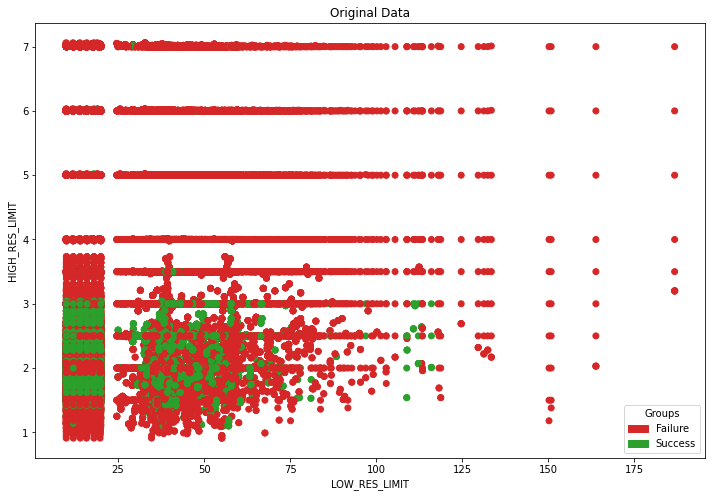

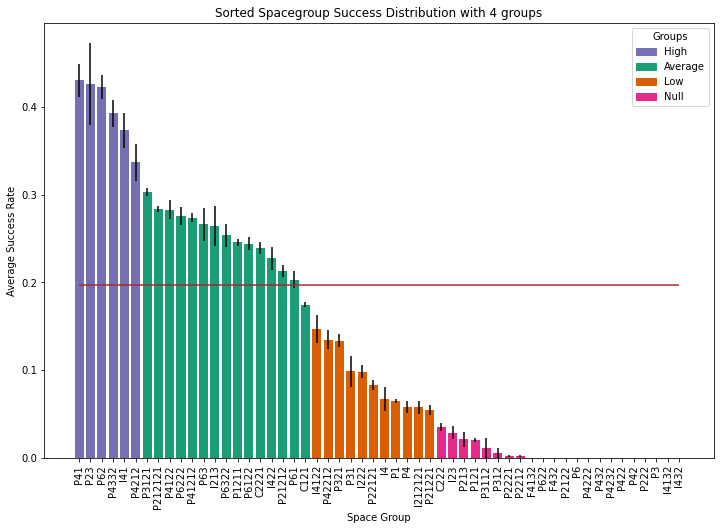

In [1]:
import sys
dirpath = r'C:\Users\César\PycharmProjects\Diamond_ML'
if dirpath not in sys.path:
    sys.path.insert(0, dirpath)
from read_data import x, y, union, pd, np, plt, plot_original_data
from grouping import cluster_spacegroups, avg_success_bar_plot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, StandardScaler
from sklearn.pipeline import Pipeline
from pca import pca


# get spacegroup clusters
n = 4
model, pred, agg_sorted = cluster_spacegroups(union, n)

# show original data and bar plot
def_x_plot, def_y_plot = "LOW_RES_LIMIT", "HIGH_RES_LIMIT"
plot_original_data(def_x_plot, def_y_plot, x, y, figsize=(12, 8))
avg_success_bar_plot(agg_sorted, y, pred)

# create pipeline
pipe_lda = Pipeline([("scaler", StandardScaler()),
                     ("lda", LinearDiscriminantAnalysis())])
lda = pipe_lda["lda"]
pipe_pca = pca()


# group spacegroup clusters
cats = pred.replace(pred.drop_duplicates().values, ["high", "average", "low", "null"])
union_dummy = union.copy()
union_dummy["CLUSTER"] = union["SPACEGROUP"].map(cats)
clusters = {i.title(): (union_dummy[union_dummy["CLUSTER"]==i].drop(["CLUSTER", "IS_SUCCESS"], axis=1),
                y[union_dummy["CLUSTER"]==i]) for i in cats.drop_duplicates()}

Then LDA/PCA is analysed within each spacegroup cluster.

--------------------
High


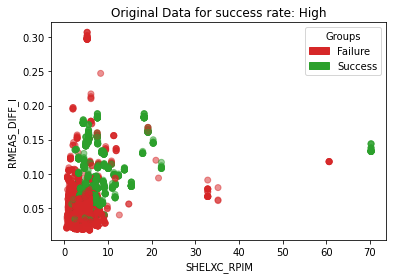

LDA


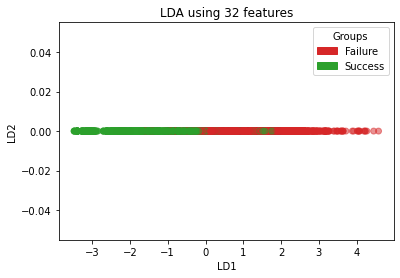

SHELXC_RANOM                 138.442206
SHELXC_RPIM                 -138.241642
RMEAS_I                      -21.575021
RMERGE_I                      11.426535
RMERGE_DIFF_I                  8.809418
RPIM_I                         4.835190
RMEAS_DIFF_I                  -4.564571
RPIM_DIFF_I                    4.095863
ANOMALOUS_SLOPE               -3.557614
DIFF_I                         2.869152
TOTAL_UNIQUE_OBSERVATIONS      1.741397
SHELXC_I_SIGMA                -1.711244
HIGH_RES_LIMIT                -1.612482
ANOMALOUS_CORRELATION          1.221591
SHELXC_CFOM                    1.176000
MULTIPLICITY                   1.096638
SHELXC_N_DATA                 -0.981362
SHELXC_SIGNAL                  0.930683
ANOMALOUS_COMPLETENESS         0.799752
I_SIGMA                        0.622383
COMPLETENESS                  -0.279273
SOLVENT_CONTENT                0.221852
CC_HALF                        0.179064
DIFF_F                         0.160646
SHELXC_COMPLETENESS           -0.137185


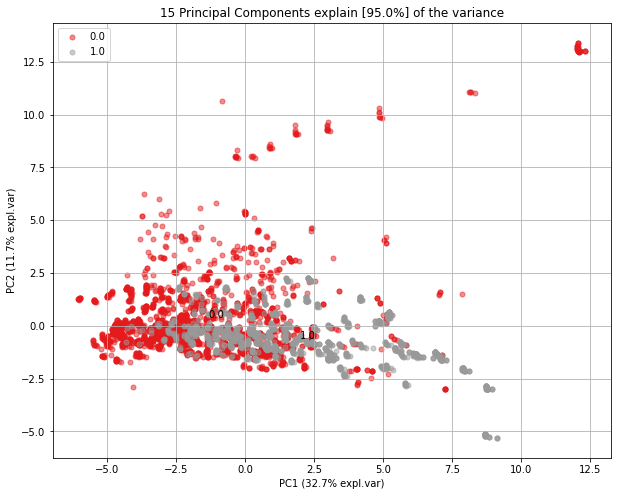

      PC                    feature   loading  type
0    PC1               RMEAS_DIFF_I  0.287495  best
1    PC2               MULTIPLICITY  0.451632  best
2    PC3                     DIFF_I -0.369709  best
3    PC4          SHELXC_RESOLUTION  0.365745  best
4    PC5     ANOMALOUS_COMPLETENESS -0.525142  best
5    PC6               SHELXC_RANOM  0.531968  best
6    PC7            SOLVENT_CONTENT  0.523392  best
7    PC8               NUMBER_SITES  0.434860  best
8    PC9              LOW_RES_LIMIT  0.926182  best
9   PC10                        F'' -0.665687  best
10  PC11                        F'' -0.499068  best
11  PC12                    CC_HALF -0.765872  best
12  PC13        SHELXC_COMPLETENESS -0.458923  best
13  PC14            SOLVENT_CONTENT  0.569898  best
14  PC15                SHELXC_CFOM -0.546709  best
15  PC16         TOTAL_OBSERVATIONS -0.375443  best
16  PC17      ANOMALOUS_CORRELATION  0.436338  best
17  PC18          SHELXC_RESOLUTION -0.580943  best
18  PC19    

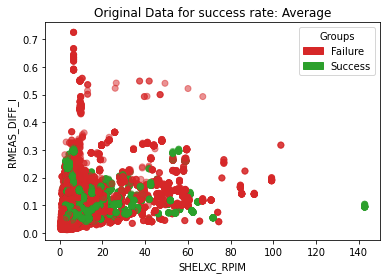

LDA


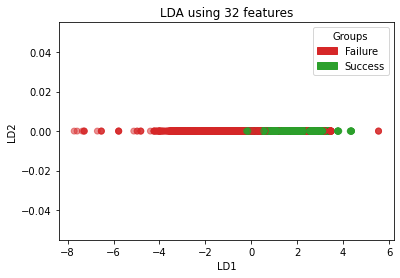

SHELXC_RPIM                 -90.978576
SHELXC_RANOM                 90.658042
RMEAS_DIFF_I                 -3.545170
ANOMALOUS_SLOPE              -2.700143
RMERGE_I                      2.443244
RMEAS_I                      -2.011548
RPIM_DIFF_I                   1.952033
RMERGE_DIFF_I                 1.605994
HIGH_RES_LIMIT               -1.523546
DIFF_I                        1.519528
ANOMALOUS_MULTIPLICITY        1.365477
MULTIPLICITY                 -1.259613
SHELXC_SIGNAL                 0.857013
DIFF_F                        0.737722
ANOMALOUS_COMPLETENESS        0.722185
SHELXC_CFOM                   0.621282
COMPLETENESS                 -0.486821
CC_HALF                       0.360261
ANOMALOUS_CORRELATION         0.352602
TOTAL_UNIQUE_OBSERVATIONS    -0.328976
RPIM_I                       -0.251293
SHELXC_I_SIGMA               -0.249397
NUMBER_SITES                  0.243902
I_SIGMA                       0.098640
F''                          -0.069207
SOLVENT_CONTENT          

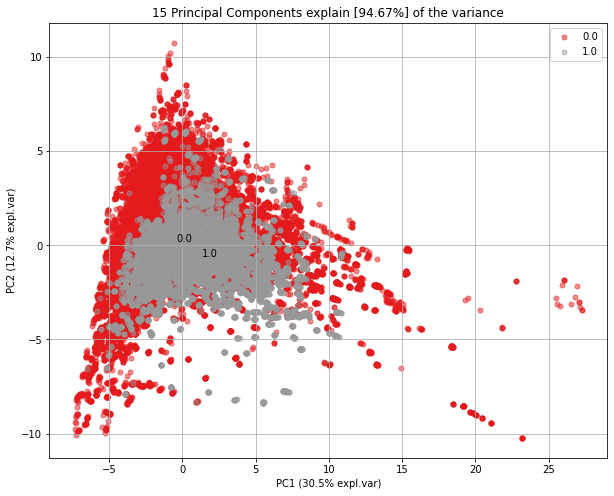

      PC                    feature   loading  type
0    PC1                RPIM_DIFF_I  0.297139  best
1    PC2                     DIFF_I -0.345818  best
2    PC3               COMPLETENESS -0.339132  best
3    PC4              SHELXC_N_DATA -0.331272  best
4    PC5         TOTAL_OBSERVATIONS  0.368686  best
5    PC6                SHELXC_RPIM  0.496540  best
6    PC7          SHELXC_RESOLUTION  0.451411  best
7    PC8            SOLVENT_CONTENT -0.728970  best
8    PC9              LOW_RES_LIMIT  0.871183  best
9   PC10                        F''  0.515114  best
10  PC11                        F'' -0.450360  best
11  PC12                    CC_HALF -0.474135  best
12  PC13                SHELXC_CFOM  0.589382  best
13  PC14                SHELXC_CFOM -0.406052  best
14  PC15        SHELXC_COMPLETENESS -0.511150  best
15  PC15             HIGH_RES_LIMIT -0.407272  weak
16   PC5               MULTIPLICITY  0.332165  weak
17  PC12                    I_SIGMA  0.348542  weak
18   PC1    

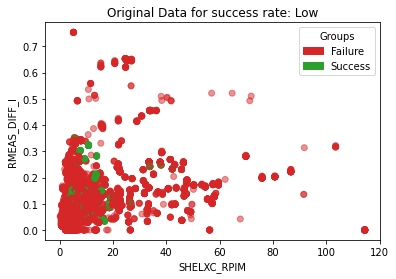

LDA


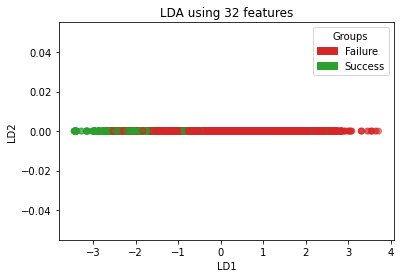

SHELXC_RPIM                 -27.173147
SHELXC_RANOM                 26.648349
RMEAS_DIFF_I                -18.921989
RMERGE_DIFF_I                11.953108
RPIM_DIFF_I                   7.707738
RMEAS_I                       2.185514
RMERGE_I                     -1.668463
HIGH_RES_LIMIT               -1.654071
SHELXC_CFOM                   1.273224
DIFF_F                       -1.060588
RPIM_I                        1.059002
DIFF_I                        0.953589
SHELXC_I_SIGMA               -0.929861
CC_HALF                       0.813722
COMPLETENESS                 -0.669289
ANOMALOUS_SLOPE              -0.637075
TOTAL_UNIQUE_OBSERVATIONS    -0.477617
ANOMALOUS_CORRELATION         0.414899
ANOMALOUS_COMPLETENESS        0.387472
I_SIGMA                       0.383609
SHELXC_RESOLUTION             0.318814
MULTIPLICITY                  0.298800
SOLVENT_CONTENT               0.237020
SHELXC_N_DATA                 0.146968
ANOMALOUS_MULTIPLICITY        0.117860
SHELXC_SIGNAL            

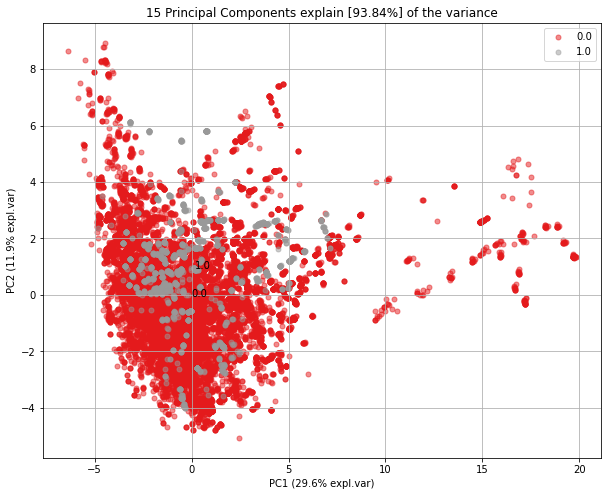

      PC                    feature   loading  type
0    PC1                     RPIM_I  0.292681  best
1    PC2                     DIFF_I  0.345962  best
2    PC3              SHELXC_SIGNAL  0.339985  best
3    PC4              SHELXC_N_DATA  0.404052  best
4    PC5        SHELXC_MULTIPLICITY -0.330969  best
5    PC6                SHELXC_RPIM  0.550742  best
6    PC7          SHELXC_RESOLUTION  0.458330  best
7    PC8            SOLVENT_CONTENT -0.803047  best
8    PC9              LOW_RES_LIMIT -0.681331  best
9   PC10                        F'' -0.764381  best
10  PC11              LOW_RES_LIMIT -0.491091  best
11  PC12                SHELXC_CFOM  0.468486  best
12  PC13                SHELXC_CFOM -0.522026  best
13  PC14             HIGH_RES_LIMIT  0.379972  best
14  PC15        SHELXC_MULTIPLICITY  0.527190  best
15  PC15               COMPLETENESS -0.283453  weak
16   PC4               MULTIPLICITY -0.313663  weak
17  PC13                    I_SIGMA  0.284956  weak
18   PC1    

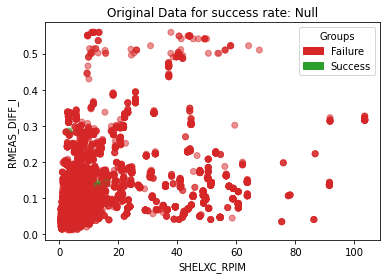

LDA


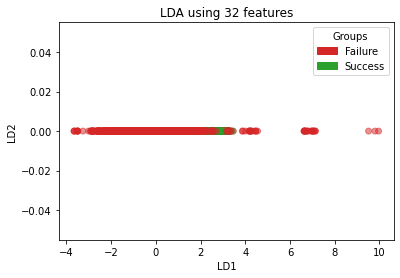

SHELXC_RPIM                 -1119.232173
SHELXC_RANOM                 1118.941002
RMEAS_I                        54.339719
RMERGE_I                      -42.880358
RPIM_I                        -12.535568
RMERGE_DIFF_I                 -10.344563
RMEAS_DIFF_I                    9.682731
MULTIPLICITY                   -6.983631
ANOMALOUS_MULTIPLICITY          6.680478
HIGH_RES_LIMIT                 -2.187913
I_SIGMA                        -1.394777
ANOMALOUS_SLOPE                -1.123836
DIFF_I                          1.094917
SHELXC_I_SIGMA                  1.079470
SHELXC_CFOM                     0.971526
ANOMALOUS_CORRELATION           0.918243
SHELXC_RESOLUTION               0.916995
SOLVENT_CONTENT                -0.831763
SHELXC_MULTIPLICITY             0.676034
NUMBER_SITES                   -0.487120
TOTAL_UNIQUE_OBSERVATIONS      -0.450440
LOW_RES_LIMIT                  -0.439784
SHELXC_N_DATA                   0.385913
COMPLETENESS                    0.272546
TOTAL_OBSERVATIO

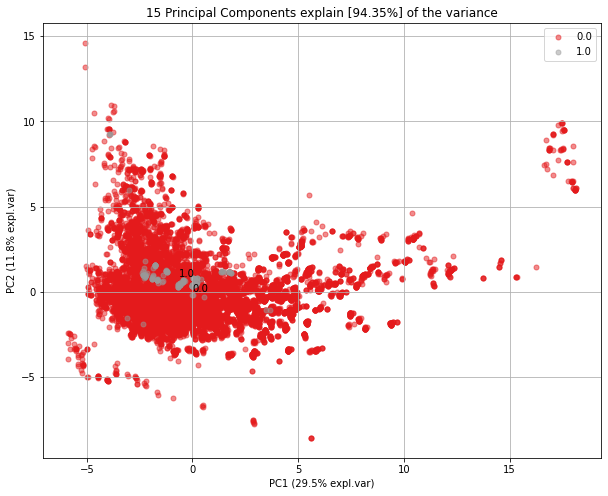

      PC                    feature   loading  type
0    PC1                RPIM_DIFF_I  0.300018  best
1    PC2                     DIFF_I  0.363461  best
2    PC3               MULTIPLICITY  0.368293  best
3    PC4          SHELXC_RESOLUTION  0.397008  best
4    PC5        SHELXC_MULTIPLICITY -0.325960  best
5    PC6                SHELXC_RPIM  0.561786  best
6    PC7              LOW_RES_LIMIT  0.477381  best
7    PC8                        F'' -0.793117  best
8    PC9                SHELXC_CFOM  0.482001  best
9   PC10              LOW_RES_LIMIT  0.728409  best
10  PC11            SOLVENT_CONTENT  0.475378  best
11  PC12            SOLVENT_CONTENT -0.504646  best
12  PC13               NUMBER_SITES -0.568713  best
13  PC14        SHELXC_COMPLETENESS -0.624648  best
14  PC15      ANOMALOUS_CORRELATION -0.599563  best
15   PC9             HIGH_RES_LIMIT  0.345962  weak
16   PC7               COMPLETENESS  0.340814  weak
17  PC12                    I_SIGMA  0.393965  weak
18   PC1    

In [2]:
# go through each spacegroup cluster
for cat_cluster, (x_clt, y_clt) in clusters.items():
    alpha = .5
    print("--------------------", cat_cluster, sep="\n")
    (fig, ax), (cmap, c, patches) = plot_original_data("SHELXC_RPIM", "RMEAS_DIFF_I", x_clt, y_clt, alpha=alpha, show=False)
    ax.set_title(f"Original Data for success rate: {cat_cluster}")
    ax.set_alpha(alpha)
    plt.show()

    for pipe, name in [(pipe_lda, "lda"), (pipe_pca, "pca")]:
        # fit to data
        X = x_clt.drop("SPACEGROUP", axis=1)
        if name == "pca":
            print("PCA")
            X_scaled = StandardScaler().fit_transform(X)
            X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
        x_new = pipe.fit_transform(X, y_clt)

        if name == "lda":
            print("LDA")
            # plot LD1 vs LD2
            fig, ax = plt.subplots()
            ax.scatter(x_new, np.zeros_like(x_new), c=c, alpha=alpha)
            ax.legend(handles=patches, title="Groups")
            ax.set_xlabel("LD1")
            ax.set_ylabel("LD2")
            ax.set_title(f"LDA using {X.shape[1]} features")
            plt.show()
            
            # use coefficients for feature importance
            coefs = pd.Series(pipe[name].coef_.sum(axis=0), index=X.columns, name="coefficients")
            sorted_abs_coef = coefs.sort_values(key=lambda a: abs(a), ascending=False)
            print(sorted_abs_coef)

        elif name == "pca":
            # plot PC1 vs PC2
            pipe.scatter(alpha_transparency=alpha, y=y_clt)
            plt.show()
            print(x_new["topfeat"])


        # show results
        #plt.show()

LDA does a better job of separating success from failure now than when the whole data was considered at once. PCA results are similar to those previously found - clusters are present, but they overlap significantly.

- For **high success rate**, LDA results in a **clear separation**.
- Clarity of LDA separation decreases as the average success rate decreases, but success clusters can be seen throughout.
- **SHELXC RANOM/RPIM** (highly inter-correlated) are the dominant LDA features in every spacegroup cluster, followed by **RMEAS/RMERGE/RPIM (DIFF) I**.
- **High resolution limit**, **anomalous slope** and **DIFF I** are also frequently high up on the table.

The previously done K Neighbors test using no transforming/LDA/PCA can once more be attempted for every spacegroup cluster.

--------------------
High
Test ratio: 25.0 - True
Total 1-0 label ratio: 40.0
Train 1-0 label ratio: 40.67 - False
Test 1-0 label ratio: 37.98 - False
--------------------------------


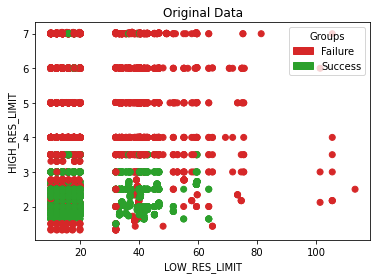

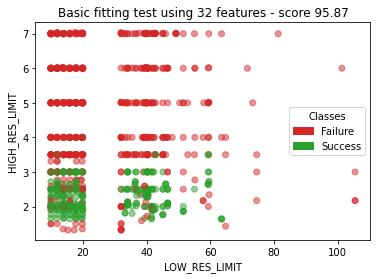

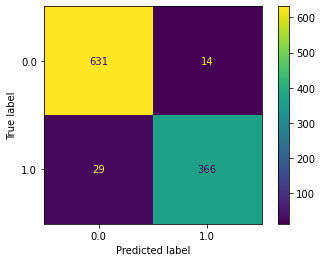

Basic:
    Accuracy: 95.87
    Precision: 96.32
    Recall: 92.66
    F1: 94.45


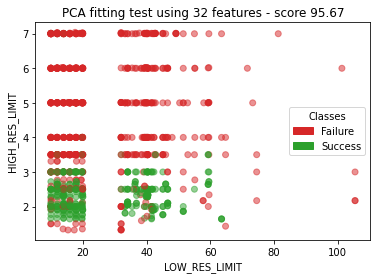

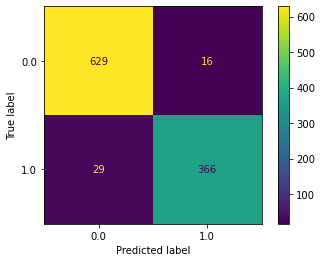

PCA:
    Accuracy: 95.67
    Precision: 95.81
    Recall: 92.66
    F1: 94.21


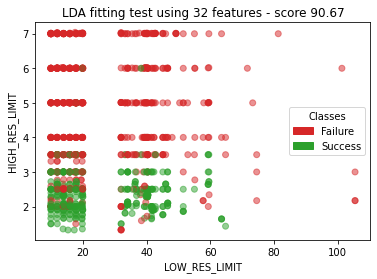

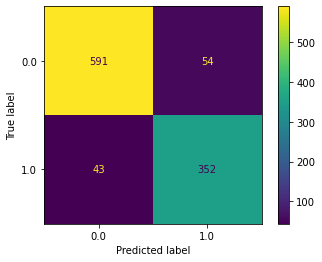

LDA:
    Accuracy: 90.67
    Precision: 86.7
    Recall: 89.11
    F1: 87.89
--------------------------------
--------------------
Average
Test ratio: 25.0 - True
Total 1-0 label ratio: 24.95
Train 1-0 label ratio: 24.88 - False
Test 1-0 label ratio: 25.16 - False
--------------------------------


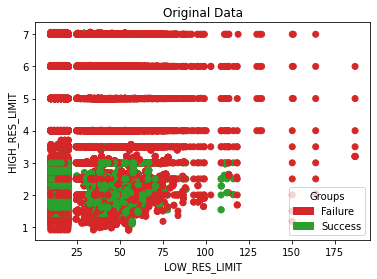

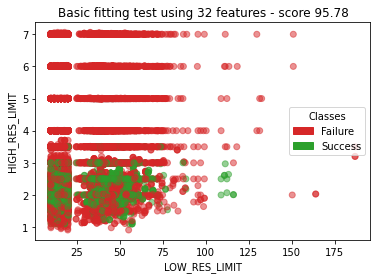

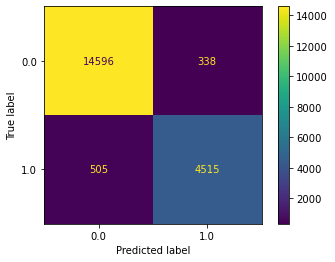

Basic:
    Accuracy: 95.78
    Precision: 93.04
    Recall: 89.94
    F1: 91.46


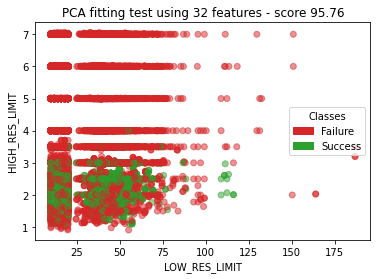

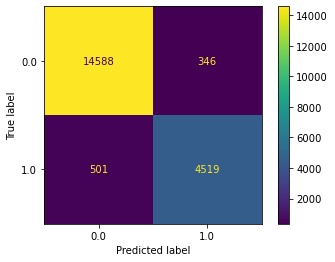

PCA:
    Accuracy: 95.76
    Precision: 92.89
    Recall: 90.02
    F1: 91.43


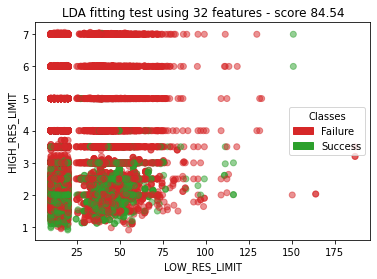

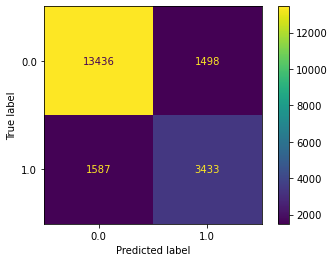

LDA:
    Accuracy: 84.54
    Precision: 69.62
    Recall: 68.39
    F1: 69.0
--------------------------------
--------------------
Low
Test ratio: 25.0 - True
Total 1-0 label ratio: 7.97
Train 1-0 label ratio: 8.09 - False
Test 1-0 label ratio: 7.6 - False
--------------------------------


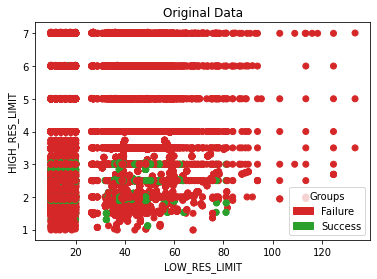

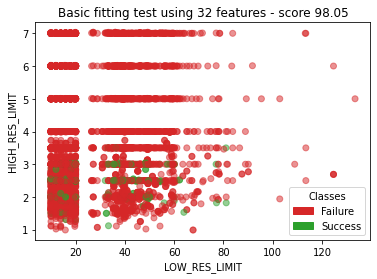

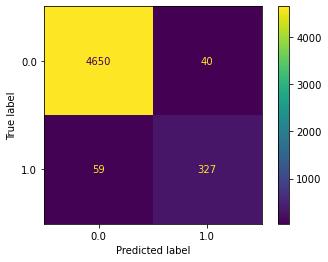

Basic:
    Accuracy: 98.05
    Precision: 89.1
    Recall: 84.72
    F1: 86.85


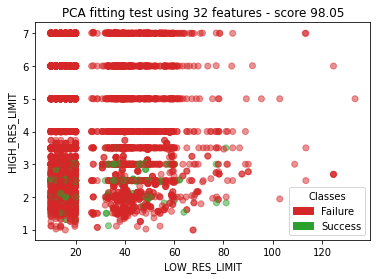

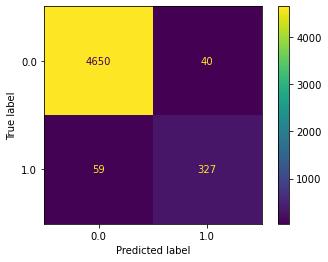

PCA:
    Accuracy: 98.05
    Precision: 89.1
    Recall: 84.72
    F1: 86.85


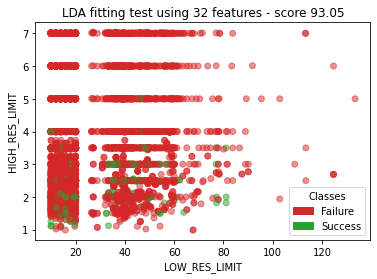

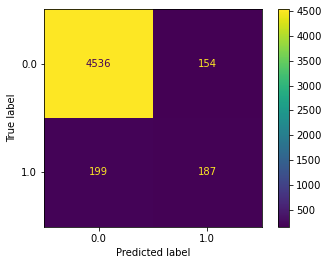

LDA:
    Accuracy: 93.05
    Precision: 54.84
    Recall: 48.45
    F1: 51.44
--------------------------------
--------------------
Null
Test ratio: 25.01 - True
Total 1-0 label ratio: 1.18
Train 1-0 label ratio: 1.16 - True
Test 1-0 label ratio: 1.25 - False
--------------------------------


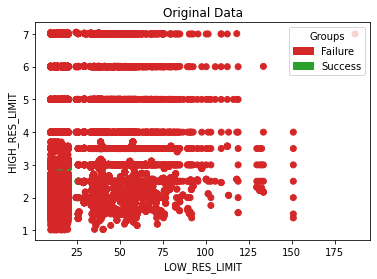

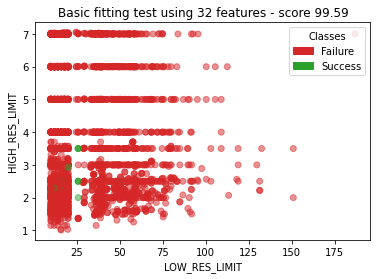

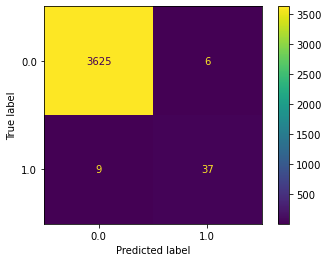

Basic:
    Accuracy: 99.59
    Precision: 86.05
    Recall: 80.43
    F1: 83.15


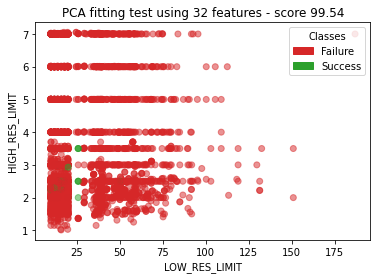

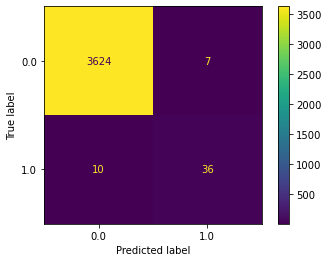

PCA:
    Accuracy: 99.54
    Precision: 83.72
    Recall: 78.26
    F1: 80.9


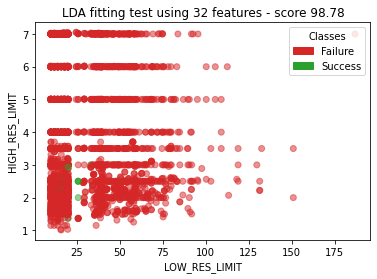

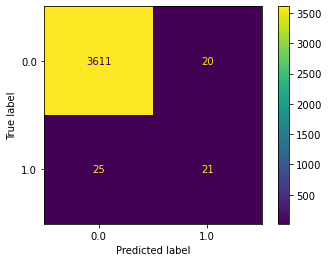

LDA:
    Accuracy: 98.78
    Precision: 51.22
    Recall: 45.65
    F1: 48.28
--------------------------------


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, precision_score, f1_score



# create pipelines
n_neighbors = 5
n_pca = 0.95
lda = Pipeline([("scaler", StandardScaler()),
                ("lda", LinearDiscriminantAnalysis()),
                ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))])
pca = Pipeline([("scaler", StandardScaler()),
                ("pca", PCA(n_components=n_pca)),
                ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))])
knn = Pipeline([("scaler", StandardScaler()),
                ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))])

# go through each spacegroup cluster
for cat_cluster, (x_clt, y_clt) in clusters.items():
    print("--------------------", cat_cluster, sep="\n")
    # split data
    test_size, random_state = 0.25, 3
    fit_cols = x_clt.drop("SPACEGROUP", axis=1).columns
    plot_cols = ["LOW_RES_LIMIT", "HIGH_RES_LIMIT"]
    X = x_clt.loc[:, fit_cols]
    x_train, x_test, y_train, y_test = train_test_split(X, y_clt, test_size=test_size, random_state=random_state)


    # check if data is split correctly
    atol = 0.0003  # 0.03% tolerance
    test_ratio = y_test.size / y_clt.size
    print(f"Test ratio: {round(test_ratio*100, 2)} - {np.isclose(test_ratio, test_size, atol=atol)}")
    total_label_ratio = y_clt.value_counts()[1]/y_clt.value_counts().sum()
    train_label_ratio = y_train.value_counts()[1]/y_train.value_counts().sum()
    test_label_ratio = y_test.value_counts()[1]/y_test.value_counts().sum()
    print(f"Total 1-0 label ratio: {round(total_label_ratio*100, 2)}",
          f"Train 1-0 label ratio: {round(train_label_ratio*100, 2)} - {np.isclose(train_label_ratio, total_label_ratio, atol=atol)}",
          f"Test 1-0 label ratio: {round(test_label_ratio*100, 2)} - {np.isclose(test_label_ratio, total_label_ratio, atol=atol)}",
          sep="\n")  # test to see if data is split correctly
    print("--------------------------------")

    # first show entire data
    plot_original_data(plot_cols[0], plot_cols[1], x_clt, y_clt)

    # show each model's predictions
    for model, title in zip((knn, pca, lda), ("Basic", "PCA", "LDA")):
        # fit model to data
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_pred = pd.Series(y_pred, index=x_test.index, name="predictions")
        score = model.score(x_test, y_test)

        # plot predicted
        try:
            x_plot, y_plot = x_test[plot_cols[0]], x_test[plot_cols[1]]
        except KeyError:
            x_plot, y_plot = x_clt.loc[x_test.index, plot_cols[0]], x_clt.loc[x_test.index, plot_cols[1]]

        fig, ax = plt.subplots()
        ax.scatter(x_plot, y_plot, c=y_pred.map(cmap), alpha=.5)
        ax.legend(handles=patches, title="Classes")

        # figure text
        ax.set_xlabel(x_plot.name)
        ax.set_ylabel(y_plot.name)
        ax.set_title(f"{title} fitting test using {x_train.shape[1]} features - "
                     f"f1 score {round(f1_score(y_test, y_pred)*100, 2)}")

        # confusion matrix
        plot_confusion_matrix(model, x_test, y_test)

        # show figure & metrics for current model
        plt.show()
        print(f"{title}:\n"
              f"    Accuracy: {round(score*100, 2)}\n"
              f"    Precision: {round(precision_score(y_test, y_pred)*100, 2)}\n"
              f"    Recall: {round(recall_score(y_test, y_pred)*100, 2)}\n"
              f"    F1: {round(f1_score(y_test, y_pred)*100, 2)}")
    
    print("--------------------------------")

Since the data is biased to negative results, especially in the latter clusters, the f1 score will be used as a main metric instead of accuracy. The following can be extracted:

- Performance decreases with each spacegroup cluster - **Higher success rate** clusters have **better predictive performance**
- **Basic models consistently the best**, PCA mostly equal to basic (worse in Null cluster), LDA consistently results in performance drop (by half in Null cluster).
- From looking at graphs, I would personally say the basic/PCA models might be overtuned, and my gut is telling me the LDA model should perform better with external data, whoever this could be (likely is) wrong.

As such, spacegroup clusters gives some improvement in predictive capabilities for high success rate spacegroups, however this is reduced for low success rate ones.

Next the data will be grouped by resolution limits.